# Derivation of Airfoil Coordinate Normal Functions

## Imports

In [31]:
import sympy as sym
import numpy as np
from sympy.vector import CoordSys3D
from sympy import lambdify
import matplotlib.pyplot as plt
%matplotlib inline

## Variables

In [32]:
x, a, b, c, d, e, t, c_a = sym.symbols('x a b c d e t c_a')
N = CoordSys3D('N')

## Symmetric Airfoil Equation

In [44]:
airfoil = x*N.i + c_a*5*t*(a*sym.sqrt(x) + b*x + c*sym.Pow(x, 2) + d*sym.Pow(x, 3) + e*sym.Pow(x, 4))*N.j
airfoil = airfoil.subs(x, x/c_a)
airfoil

x/c_a*N.i + (5*c_a*t*(a*sqrt(x/c_a) + b*x/c_a + c*x**2/c_a**2 + d*x**3/c_a**3 + e*x**4/c_a**4))*N.j

## Tangent Vector

In [45]:
tangent = sym.diff(airfoil, x)

In [46]:
tangent

1/c_a*N.i + (5*c_a*t*(a*sqrt(x/c_a)/(2*x) + b/c_a + 2*c*x/c_a**2 + 3*d*x**2/c_a**3 + 4*e*x**3/c_a**4))*N.j

## Normal Vector

In [47]:
normal = -1*tangent.coeff(N.j)*N.i + tangent.coeff(N.i)*N.j

In [48]:
unit_normal = normal/normal.magnitude()

In [49]:
unit_normal

(-5*c_a*t*(a*sqrt(x/c_a)/(2*x) + b/c_a + 2*c*x/c_a**2 + 3*d*x**2/c_a**3 + 4*e*x**3/c_a**4)/sqrt(25*c_a**2*t**2*(a*sqrt(x/c_a)/(2*x) + b/c_a + 2*c*x/c_a**2 + 3*d*x**2/c_a**3 + 4*e*x**3/c_a**4)**2 + c_a**(-2)))*N.i + (1/(c_a*sqrt(25*c_a**2*t**2*(a*sqrt(x/c_a)/(2*x) + b/c_a + 2*c*x/c_a**2 + 3*d*x**2/c_a**3 + 4*e*x**3/c_a**4)**2 + c_a**(-2))))*N.j

## Plotting/Testing

In [50]:
coeffs = {
    'a':0.2969,
    'b':-0.1260,
    'c':-0.3516,
    'd':0.2843,
    'e':-0.1015,
    't':0.12,
    'c_a':6*0.0254
}
airfoil = airfoil.subs(coeffs)
unit_normal = unit_normal.subs(coeffs)

In [51]:
unit_normal

(-0.00132865992014187*(-752.638041413353*x**3 + 240.959033974061*x**2 - 30.2767272201211*x - 0.826771653543307 + 0.380266194407186/sqrt(x))/sqrt((-x**3 + 0.320152610837438*x**2 - 0.0402274739704433*x - 0.00109849835917241 + 0.000505244451493705/sqrt(x))**2 + 0.00909044827683273))*N.i + (0.095343842364532/sqrt((-x**3 + 0.320152610837438*x**2 - 0.0402274739704433*x - 0.00109849835917241 + 0.000505244451493705/sqrt(x))**2 + 0.00909044827683273))*N.j

In [52]:
fx_airfoil = lambdify(x, airfoil.coeff(N.i))
fy_airfoil = lambdify(x, airfoil.coeff(N.j))
fx_norm = lambdify(x, unit_normal.coeff(N.i))
fy_norm = lambdify(x, unit_normal.coeff(N.j))

[-4.60202526e-01 -8.04554619e-02 -5.25492788e-02 -3.93469932e-02
 -3.10181634e-02 -2.50248922e-02 -2.03758204e-02 -1.65926124e-02
 -1.34118973e-02 -1.06747510e-02 -8.27852994e-03 -6.15333734e-03
 -4.24949764e-03 -2.53042926e-03 -9.68365227e-04  4.58332145e-04
  1.76691999e-03  2.97145004e-03  4.08358004e-03  5.11314752e-03
  6.06858384e-03  6.95721875e-03  7.78550790e-03  8.55920552e-03
  9.28349709e-03  9.96310258e-03  1.06023577e-02  1.12052784e-02
  1.17756127e-02  1.23168825e-02  1.28324176e-02  1.33253842e-02
  1.37988074e-02  1.42555911e-02  1.46985340e-02  1.51303429e-02
  1.55536446e-02  1.59709956e-02  1.63848902e-02  1.67977680e-02
  1.72120198e-02  1.76299934e-02  1.80539976e-02  1.84863066e-02
  1.89291636e-02  1.93847837e-02  1.98553566e-02  2.03430490e-02
  2.08500069e-02  2.13783570e-02]


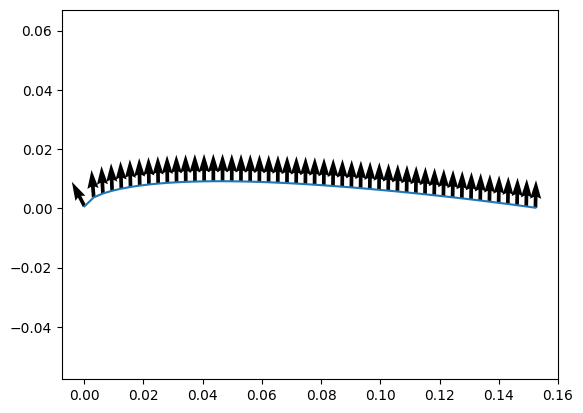

In [53]:
x_c = np.linspace(0.0001, 6*0.0254, 50)
y_c = fy_airfoil(x_c)
x_n = fx_norm(x_c)
y_n = fy_norm(x_c)
print(x_n)
plt.plot(x_c, y_c)
plt.quiver(x_c, y_c, x_n, y_n)
plt.axis('equal')
plt.show()